In [8]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/daily/datcomb_dark_spec_zdone.fits"

In [5]:
datcomb = Table.read(filename)

In [6]:
datcomb

TARGETID,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,LOCATION,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,ZWARN_MTL,Z_QN,Z_QN_CONF,IS_QSO_QN
int64,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int64,int32,int32,float32,float32,int32,int32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,int16
2245542969081864,-1.3446764907095643e-05,1.5894114338338914e-05,0,7754.662415566316,336.4481605567794 .. 0.0,7839,STAR,K,5,218.28821425878778,2310,1107,0,296.99585,-25.278032,1450,1746,1,1197.9147,1,0.0,0.0,-0.004,0.004,0.79204655,0.12895094,84.97041,683.2553,3.2652342,1.4483291,26.14523,0.042975046,2461.3499,7.8782005,39.007755,88.26647,0.0,4378.924,18.776148,45.999523,114.54065,85.01339,7523.5293,29.919582,86.45561,0,2.209186591898619,6.476222922709946e-05,0
2245556374077467,-5.135397381508073e-05,1.2381313168624236e-05,0,8058.905965262163,710.6437063048103 .. 0.0,7860,STAR,F,5,712.7502490061261,6113,3367,0,-76.374,192.0588,1450,1746,1,1197.9147,1,0.008,0.008,0.009,0.009,0.79221386,0.1235955,93.28999,643.4113,3.1475787,1.2246996,29.898808,0.03233616,2146.694,7.8437414,41.141224,85.27242,0.0,3993.5493,17.641565,42.29768,115.29483,93.32233,6783.655,28.632885,84.663605,0,1.5094783940768157,0.00041109846143696783,0
2245588221427725,0.06450145927601829,4.21093961560803e-05,4,7505.346488979179,44.22713589757207 .. -16.493454568391797,7862,GALAXY,--,10,8.045477989595383,6426,3174,0,-198.10048,302.228,1450,1747,1,865.183,1,-0.004,0.004,0.002,0.002,0.79236317,0.09577291,63.9064,506.4931,2.6086128,1.0576961,30.959219,0.045774776,2456.0293,9.41969,43.337227,90.319115,0.0,4117.0015,20.4443,44.27802,121.37411,63.952175,7079.524,32.472603,88.67294,4,3.7526942111584134,0.0024950885614366666,0
2245594361888785,-4.840266272699311e-05,6.015311876916455e-05,0,7447.016773663292,147.45228264850678 .. 0.0,7816,STAR,B,5,79.3890126125716,4419,2166,0,294.74417,248.56029,1450,1786,1,1154.0071,1,0.016,0.016,-0.003,0.003,0.79370904,0.09932805,62.972176,530.2574,2.5718892,1.1123546,28.623796,0.085196964,2827.0647,8.718294,42.50204,79.5653,0.0,3824.0825,16.636023,39.546524,108.28842,63.057373,7181.4043,27.926205,83.16092,0,0.556172061223122,4.724117326274783e-05,0
2252936398766081,-0.0005548145489283045,4.180347766921548e-06,0,11455.072369831814,-1330.0638462170027 .. 0.0,7662,STAR,M,5,5697.2080966055255,484,336,0,-48.95901,-403.32285,1025,1586,1,1752.6431,1,0.004,0.004,0.004,0.004,0.7926832,0.13360423,122.339355,690.9744,3.471233,1.1831518,32.424313,0.04999377,2969.4797,9.481106,47.229824,101.159966,0.0,4627.8364,20.567337,48.39827,133.71788,122.38935,8288.291,33.519676,96.81125,0,2.5977746395586236,0.0004125261047458695,0
2252942333706240,0.00019482222406989622,3.08894281338979e-05,0,8200.340718773376,680.6390070201061 .. 0.0,7725,STAR,G,5,165.0494317140474,1444,520,0,171.07639,-346.7892,1025,1586,1,1752.6431,1,0.0,0.0,-0.004,0.004,0.79248947,0.12853645,75.420395,748.49536,3.2824583,1.4997259,33.009987,0.045204133,2825.2788,9.400228,47.204376,101.48047,0.0,5011.6343,21.351624,50.787357,134.61899,75.4656,8585.408,34.03431,99.491455,0,0.8377199084938183,0.0008374912852693073,0
2252948285423616,-6.076423365523347e-05,5.04183280616576e-06,0,11595.1819083041,-686.8757760260728 .. 0.0,7740,STAR,M,5,10522.212369030114,1401,504,0,177.84886,-319.64313,1025,1586,1,1752.6431,1,-0.004,0.004,-0.001,0.001,0.79237753,0.13872556,82.45216,805.43066,3.5498364,1.605692,34.72

In [9]:
ii  = (datcomb['SPECTYPE']=='GALAXY') & (np.abs(datcomb['Z'])<1E-4)

In [10]:
np.count_nonzero(ii)

16545

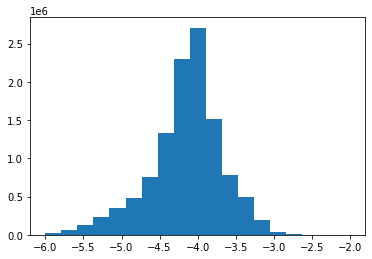

In [17]:
_ = plt.hist(np.log10(datcomb['ZERR']), bins=np.linspace(-6,-2,20))

In [100]:
is_warn = datcomb['ZWARN_MTL']!=0
is_galaxy = datcomb['SPECTYPE']=='GALAXY'
is_star = datcomb['SPECTYPE']=='STAR'
is_qso = datcomb['SPECTYPE']=='QSO'

In [87]:
print(np.count_nonzero(is_warn), np.count_nonzero(is_warn&is_galaxy), np.count_nonzero(is_warn&is_star))
print(np.count_nonzero(is_warn & is_qso))

1966335 1625782 229947
110606


In [88]:
print('QSO warning [%]', np.count_nonzero(is_warn & is_qso)/np.count_nonzero(is_qso))
print('STAR warning [%]', np.count_nonzero(is_warn & is_star)/np.count_nonzero(is_star))
print('GALAXY warning [%]', np.count_nonzero(is_warn & is_galaxy)/np.count_nonzero(is_galaxy))

QSO warning [%] 0.06008211138597457
STAR warning [%] 0.32577318127080823
GALAXY warning [%] 0.17893077279073133


problematic fibers for galaxies (46 in total):
 [2171 2250 2251 2252 2253 2254 2255 2257 2259 2260 2261 2262 2263 2265
 2266 2267 2268 2269 2270 2271 2587 2628 2643 2644 2664 2665 2666 2667
 2668 2669 2670 2671 2672 2674 2900 3274 3546 3698 3699 3756 3784 3805
 3819 3820 3887 3974]


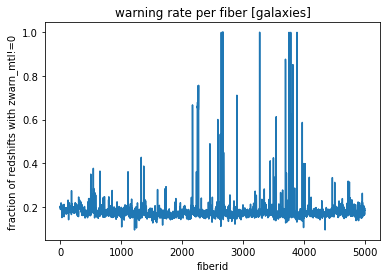

In [113]:
import collections

c_warn = collections.Counter(datcomb['FIBER'][is_warn & is_galaxy])
c_gal = collections.Counter(datcomb['FIBER'][is_galaxy])

fiber_id = []
warning_ratio = []
for i in c_warn.keys():
    fiber_id.append(i)
    warning_ratio.append(c_warn[i]/c_gal[i])
ii_sort = np.argsort(fiber_id)
fiber_id = np.array(fiber_id)[ii_sort]
warning_ratio = np.array(warning_ratio)[ii_sort]

plt.title('warning rate per fiber [galaxies]')
plt.plot(fiber_id, warning_ratio)
plt.xlabel('fiberid')
plt.ylabel('fraction of redshifts with zwarn_mtl!=0')
ii = ((warning_ratio-warning_ratio.mean())/warning_ratio.std())>5
print('problematic fibers for galaxies ({} in total):\n {}'.format(np.count_nonzero(ii),fiber_id[ii]))

problematic fibers for qsos (41 in total):
 [2171 2250 2251 2252 2253 2254 2255 2257 2259 2261 2262 2263 2265 2266
 2267 2268 2269 2270 2271 2643 2644 2664 2665 2666 2667 2668 2669 2670
 2671 2672 2674 2682 2900 3698 3699 3756 3784 3805 3819 3820 3887]


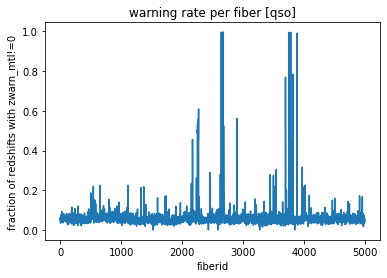

In [112]:
c_warn_qso = collections.Counter(datcomb['FIBER'][is_warn & is_qso])
c_qso = collections.Counter(datcomb['FIBER'][is_qso])

fiber_id_qso = []
warning_ratio_qso = []
for i in c_warn.keys():
    fiber_id_qso.append(i)
    warning_ratio_qso.append(c_warn_qso[i]/(c_qso[i]+1))
ii_sort = np.argsort(fiber_id_qso)
fiber_id_qso = np.array(fiber_id_qso)[ii_sort]
warning_ratio_qso = np.array(warning_ratio_qso)[ii_sort]

plt.title('warning rate per fiber [qso]')
plt.plot(fiber_id_qso, warning_ratio_qso)
plt.xlabel('fiberid')
plt.ylabel('fraction of redshifts with zwarn_mtl!=0')
ii = ((warning_ratio_qso-warning_ratio_qso.mean())/warning_ratio_qso.std())>5
print('problematic fibers for qsos ({} in total):\n {}'.format(np.count_nonzero(ii),fiber_id_qso[ii]))

problematic fibers for star (0 in total):
 []


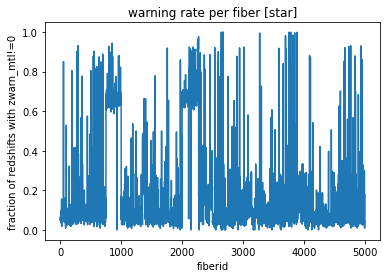

In [117]:
c_warn_star = collections.Counter(datcomb['FIBER'][is_warn & is_star])
c_star = collections.Counter(datcomb['FIBER'][is_star])

fiber_id_star = []
warning_ratio_star = []
for i in c_warn.keys():
    fiber_id_star.append(i)
    warning_ratio_star.append(c_warn_star[i]/(c_star[i]+1))
ii_sort = np.argsort(fiber_id_star)
fiber_id_star = np.array(fiber_id_star)[ii_sort]
warning_ratio_star = np.array(warning_ratio_star)[ii_sort]

plt.title('warning rate per fiber [star]')
plt.plot(fiber_id_star, warning_ratio_star)
plt.xlabel('fiberid')
plt.ylabel('fraction of redshifts with zwarn_mtl!=0')
ii = ((warning_ratio_star-warning_ratio_star.mean())/warning_ratio_star.std())>5
print('problematic fibers for star ({} in total):\n {}'.format(np.count_nonzero(ii),fiber_id_star[ii]))